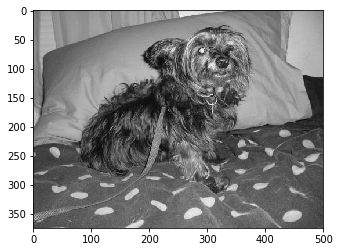

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from keras.preprocessing.image import ImageDataGenerator

DATADIR = "data/PetImages"
CATEGORIES = ['Dog', 'Cat']
IMG_SIZE = 128

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break

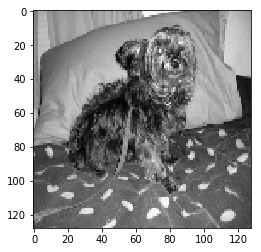

In [62]:
test_path = "data/PetImages/Dog/0.jpg"
img_array = cv2.imread(test_path, cv2.IMREAD_GRAYSCALE)
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [124]:
np.expand_dims(np.expand_dims(new_array, 0),3).shape

(1, 128, 128, 1)

In [121]:
new_array2.shape

(1, 128, 128, 1)

In [156]:
aug_gen = ImageDataGenerator(rescale=1./255, rotation_range=10, width_shift_range=0.1,
                            height_shift_range=0.1, shear_range=0.15,
                             zoom_range=0.1, channel_shift_range=10., horizontal_flip=True)
aug_iter = aug_gen.flow(new_array2)
aug_images = [next(aug_iter)[0] for i in range(10)]

In [125]:
aug_images[0].shape

(128, 128, 1)

In [158]:
aug_iter[0]

array([[[[0.51121986],
         [0.5251046 ],
         [0.5450547 ],
         ...,
         [0.4470155 ],
         [0.4470155 ],
         [0.4470155 ]],

        [[0.5115891 ],
         [0.52639693],
         [0.5450547 ],
         ...,
         [0.4470155 ],
         [0.4470155 ],
         [0.4470155 ]],

        [[0.51195836],
         [0.52768934],
         [0.5450547 ],
         ...,
         [0.4470155 ],
         [0.4470155 ],
         [0.4470155 ]],

        ...,

        [[0.28595227],
         [0.2847929 ],
         [0.29318225],
         ...,
         [0.28421667],
         [0.28557578],
         [0.28693482]],

        [[0.28576764],
         [0.28553143],
         [0.2922591 ],
         ...,
         [0.26300973],
         [0.26378632],
         [0.2645629 ]],

        [[0.28558302],
         [0.28626993],
         [0.29133594],
         ...,
         [0.25878018],
         [0.25878018],
         [0.25878018]]]], dtype=float32)

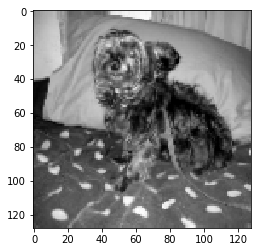

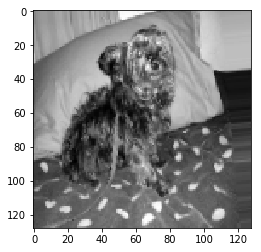

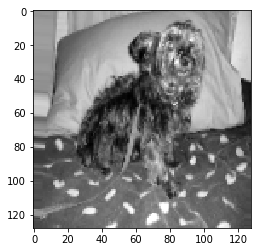

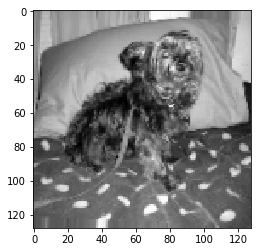

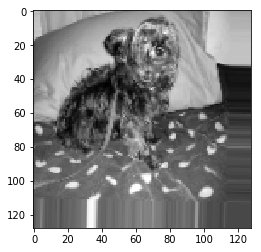

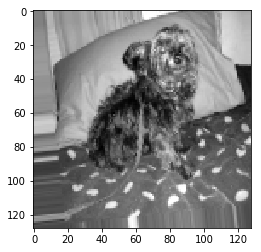

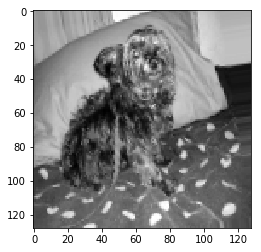

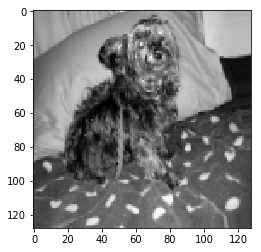

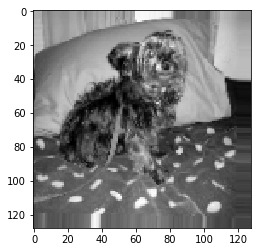

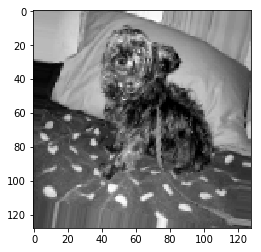

In [120]:
for img in aug_images:
    plt.imshow(img[:,:,0], cmap='gray')
    plt.show()

In [170]:
training_data = []

aug_gen = ImageDataGenerator(rescale=1./255, rotation_range=10, width_shift_range=0.1,
                            height_shift_range=0.1, shear_range=0.15,
                             zoom_range=0.1, channel_shift_range=10., horizontal_flip=True)

# If this dataset gets much bigger
# I will run out of Memory
# Will need to use flow_from_directory with batch params
def create_training_data():
    counter = 0
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
#                 Read the image as grayscale
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        
#                 Add the axis and channel dims and set to 1 for grayscale
                final_array = np.expand_dims(np.expand_dims(new_array, 0),3)
    
#                 Augment the images
                aug_iter = aug_gen.flow(final_array)
    
#                 Create list of images, one for each augmentation
                aug_images = [next(aug_iter)[0] for i in range(10)]
#                 Loop through the images and append each image to the training_data
                for img in aug_images:
                    training_data.append([img, class_num])
#                 counter += 1
#                 if counter > 10:
#                     break
            except Exception as e:
                pass
create_training_data()

In [171]:
print(len(training_data))

249460


In [174]:
import random
random.shuffle(training_data)

In [175]:
# Save the data into pickle_format
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [176]:
import pickle
pickle_out = open("data/pickled_augmented/X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()
pickle_out = open("data/pickled_augmented/y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

OverflowError: cannot serialize a bytes object larger than 4 GiB

In [1]:
from pyocser import ocdumps, ocloads

ModuleNotFoundError: No module named 'pyocser'